In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import io
import statsmodels.formula.api as smf
import scipy.stats as stats
import matplotlib.pyplot as plt
import re
from scipy.stats import f
import statsmodels.api as sm

# Flights Price in India

## В данной работе мы проанализируем зависимость цены перелета внутри Индии от многих факторов.

In [138]:
df=pd.read_csv('https://raw.githubusercontent.com/EvaSaakyan/EvaS-Econometrica/main/Dataset.csv')
df

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,1,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,1,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,1,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,1,Evening,Hyderabad,Business,10.00,49,81585


In [139]:
df['Class']=df.apply(lambda x: '1' if x['class']=='Economy' else '0', axis=1)
df=df.drop(columns='class')
df

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left,price,Class
0,0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,2.17,1,5953,1
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,2.33,1,5953,1
2,2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,2.17,1,5956,1
3,3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,2.25,1,5955,1
4,4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,2.33,1,5955,1
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,1,Evening,Hyderabad,10.08,49,69265,0
300149,300149,Vistara,UK-826,Chennai,Afternoon,1,Night,Hyderabad,10.42,49,77105,0
300150,300150,Vistara,UK-832,Chennai,Early_Morning,1,Night,Hyderabad,13.83,49,79099,0
300151,300151,Vistara,UK-828,Chennai,Early_Morning,1,Evening,Hyderabad,10.00,49,81585,0


In [140]:
df.rename(columns={'days_left':'DaysLeft'}, inplace=True)
df

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,duration,DaysLeft,price,Class
0,0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,2.17,1,5953,1
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,2.33,1,5953,1
2,2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,2.17,1,5956,1
3,3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,2.25,1,5955,1
4,4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,2.33,1,5955,1
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,1,Evening,Hyderabad,10.08,49,69265,0
300149,300149,Vistara,UK-826,Chennai,Afternoon,1,Night,Hyderabad,10.42,49,77105,0
300150,300150,Vistara,UK-832,Chennai,Early_Morning,1,Night,Hyderabad,13.83,49,79099,0
300151,300151,Vistara,UK-828,Chennai,Early_Morning,1,Evening,Hyderabad,10.00,49,81585,0


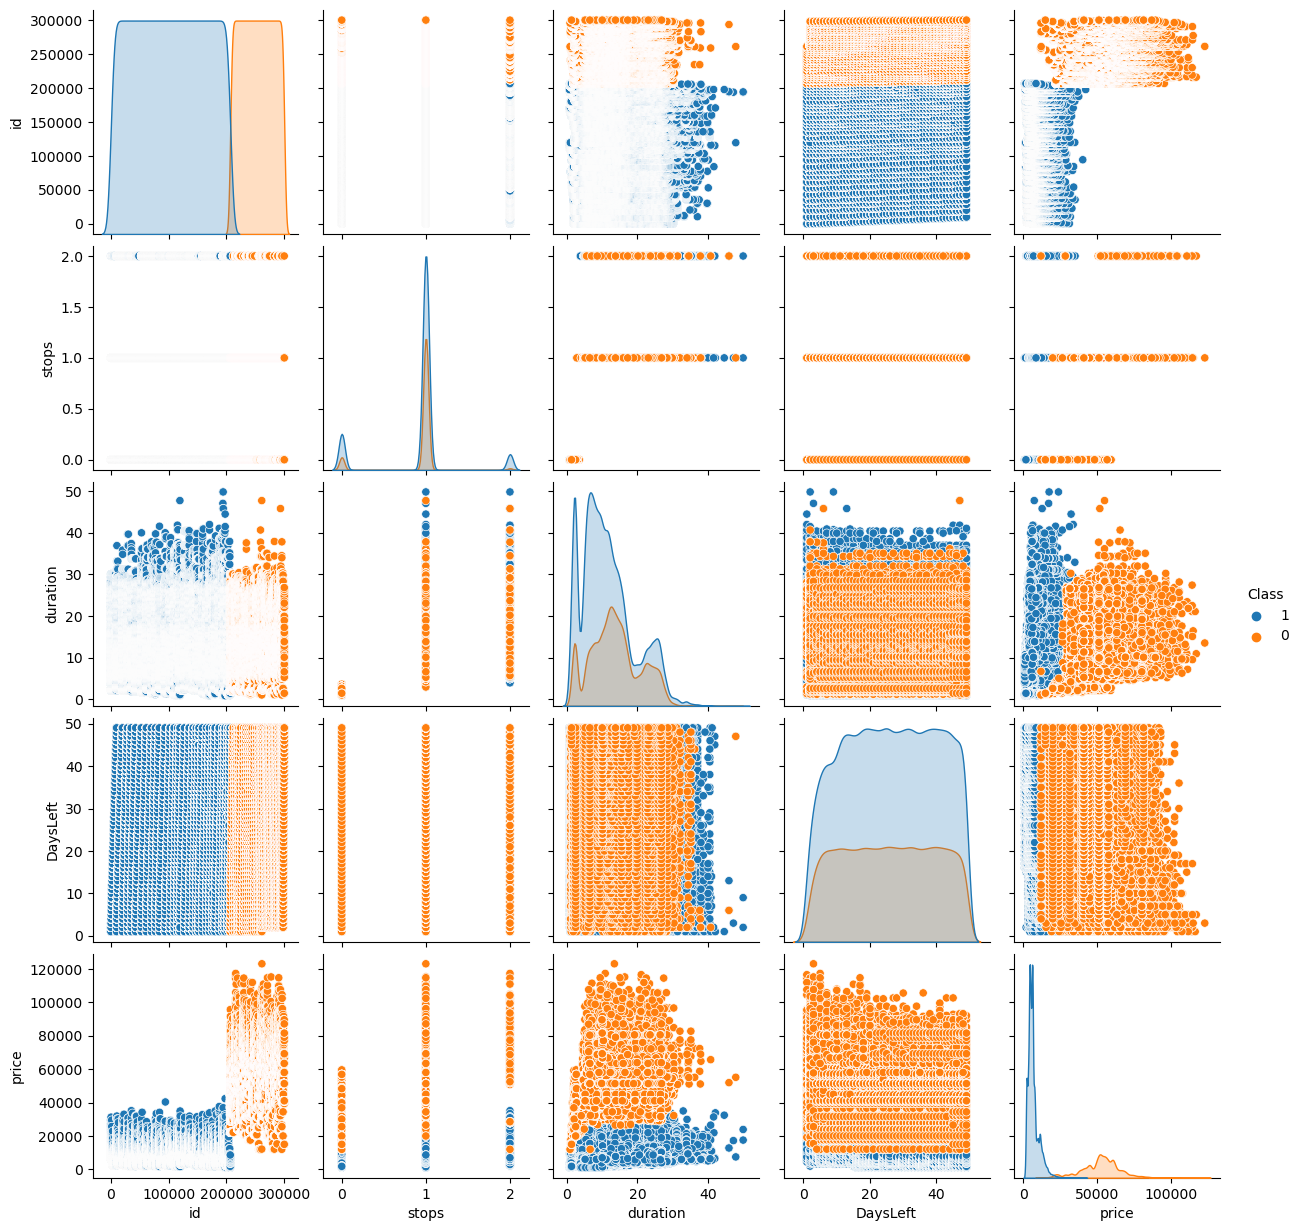

In [105]:
sns.pairplot(df, hue='Class')
plt.show(sns)

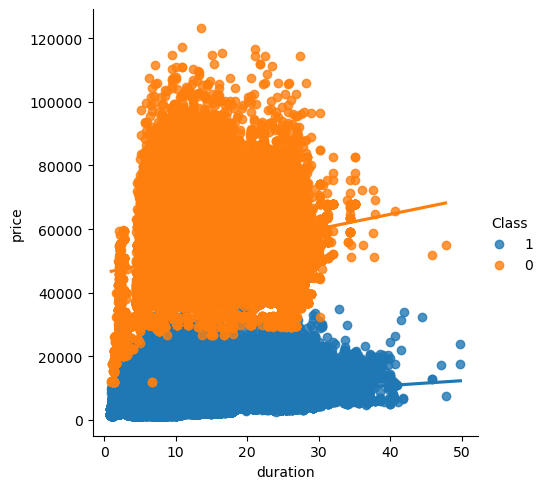

In [106]:
sns.lmplot(x='duration', y='price', data=df, hue='Class')
plt.show(sns)

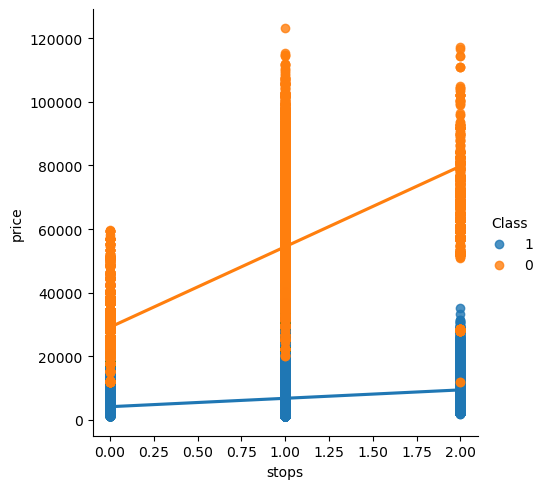

In [107]:
sns.lmplot(x='stops', y='price', data=df, hue='Class')
plt.show(sns)

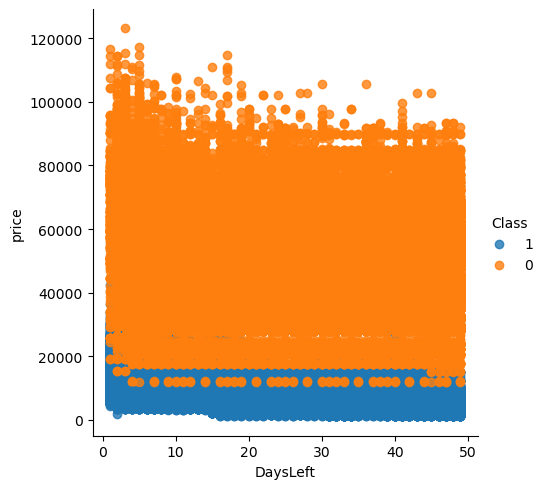

In [108]:
sns.lmplot(x='DaysLeft', y='price', data=df, hue='Class')
plt.show(sns)

## Спецификация

$$
price = \beta_0+\beta_1*duration+\beta_2*stops+\beta_3*DaysLeft+\beta_4*Class
$$

In [109]:
# специфицируем модель через формулу
flight_model = smf.ols(formula='price~duration+stops+DaysLeft+Class', data=df).fit()
# Коэфициенты модели с округление
flight_model.params.round(2)

Intercept     49288.29
Class[T.1]   -45769.69
duration         66.26
stops          6168.72
DaysLeft       -130.60
dtype: float64

1. При увеличении длительности полета на 1 час ,стоимость перелета увеличивается на 66.26 индийских рупий, при прочих равных
2. При увеличении числа пересадок на 1, стоимость перелета увеличивается на 6168.72 индийских рупий, при прочих равных
3. При увеличении числа дней, оставшихся до полета, на 1, стоимость перелета уменьшается на 130.60 индийских рупий, при прочих равных
4. Билет в эконом-класс стоит на 45 769.69 индийских рупий меньше, чем в бизнесс-класс, при прочих равных

## Значимость коэффициентов

In [110]:
flight_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                 6.768e+05
Date:                Tue, 16 May 2023   Prob (F-statistic):               0.00
Time:                        18:39:50   Log-Likelihood:            -3.0906e+06
No. Observations:              300153   AIC:                         6.181e+06
Df Residuals:                  300148   BIC:                         6.181e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.929e+04     47.753   1032.160      0.000    4.92e+04    4.94e+04
Class[T.1] -4.577e+04     28.616  -1599.468      0.000   -4.58e+04   -4.57e+04
duration      66.2597      2.087     31.756      0.000      62.170      70.349
stops       6168.7240     37.305    165.360      0.000    6095.608    6241.840
DaysLeft    -130.5974      0.966   -135.200      0.000    -132.491    -128.704
==============================================================================
Omnibus:                    39332.755   Durbin-Watson:                   0.323
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           375098.998
Skew:                           0.299   Prob(JB):                         0.00
Kurtosis:                       8.444   Cond. No.                         128.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
flight_model = smf.ols(formula='price~duration+stops+DaysLeft+Class', data=df).fit()
flight_model.summary(alpha=0.05).tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,4.929e+04,47.753,1032.160,0.000,4.92e+04,4.94e+04
Class[T.1],-4.577e+04,28.616,-1599.468,0.000,-4.58e+04,-4.57e+04
duration,66.2597,2.087,31.756,0.000,62.170,70.349
stops,6168.7240,37.305,165.360,0.000,6095.608,6241.840
DaysLeft,-130.5974,0.966,-135.200,0.000,-132.491,-128.704


## Тестируем гипотезу
$$
H_0: \beta_j=0 \\
H_1: \beta_j \neq 0 
$$

In [112]:
flight='''Names	coef	std.err	t	P>|t|	[0.025	0.975]
Intercept	4.929e+04	47.753	1032.160	0.000	4.92e+04	4.94e+04
Class[T.1]	-4.577e+04	28.616	-1599.468	0.000	-4.58e+04	-4.57e+04
duration	66.2597	2.087	31.756	0.000	62.170	70.349
stops	6168.7240	37.305	165.360	0.000	6095.608	6241.840
DaysLeft	-130.5974	0.966	-135.200	0.000	-132.491	-128.704
'''

In [113]:
df_flight = pd.read_csv(io.StringIO(flight), sep='\s+')
df_flight

,Names,coef,std.err,t,P>|t|,[0.025,0.975]
0,Intercept,49290.0000,47.753,1032.160,0.0,49200.000,49400.000
1,Class[T.1],-45770.0000,28.616,-1599.468,0.0,-45800.000,-45700.000
2,duration,66.2597,2.087,31.756,0.0,62.170,70.349
3,stops,6168.7240,37.305,165.360,0.0,6095.608,6241.840
4,DaysLeft,-130.5974,0.966,-135.200,0.0,-132.491,-128.704


In [114]:
alpha = 0.05
t_crit= stats.t.ppf(1-alpha/2,len(df)-5)
round (t_crit, 3)

1.96

In [115]:
df_flight['Znachimost'] = df_flight.apply(lambda x: 'znachim' if np.abs(x['t'])>t_crit else 'ne znachim', axis=1 )
df_flight

,Names,coef,std.err,t,P>|t|,[0.025,0.975],Znachimost
0,Intercept,49290.0000,47.753,1032.160,0.0,49200.000,49400.000,znachim
1,Class[T.1],-45770.0000,28.616,-1599.468,0.0,-45800.000,-45700.000,znachim
2,duration,66.2597,2.087,31.756,0.0,62.170,70.349,znachim
3,stops,6168.7240,37.305,165.360,0.0,6095.608,6241.840,znachim
4,DaysLeft,-130.5974,0.966,-135.200,0.0,-132.491,-128.704,znachim


### Проведя t-тест, мы пришли к выводу, что все регрессоры в модели значимы.

## Значимость регрессии

### Далее при помощи F-теста проверим значимость регрессии

### Тестируем гипотезу
$$ H_0: \beta_{0}=\beta_{1} = \dots = \beta_{k} = 0 $$
$$ H_1: \beta_{0}^2+\beta_{1}^2 + \dots +\beta_{k}^2 > 0 $$

In [116]:
flight_model.fvalue, flight_model.f_pvalue

(676836.0181414256, 0.0)

In [117]:
F_cr=f.ppf(q=1-0.05, dfn=flight_model.df_model, dfd=flight_model.df_resid)
F_cr

2.37196184548959

### Вывод: регрессия значима

## F-тест Совместная значимость

### Тестируем гипотезу
$$ H_0: \beta_{duration}=\beta_{stops} = \beta_{DaysLeft} = 0 $$
$$ H_1: \beta_{duration}^2+\beta_{stops}^2 + \beta_{DaysLeft}^2 > 0 $$

In [118]:
flight_model_rest = smf.ols(formula='price~duration+stops+DaysLeft', data=df).fit()
flight_model_rest.params.round(3)

Intercept    15709.559
duration       587.017
stops         1816.931
DaysLeft      -141.253
dtype: float64

In [119]:
R2 = flight_model_rest.rsquared.round(3)
R2

0.05

In [120]:
unrest, rest = np.float_(re.findall(r'([-+]?\d+.\d+)', 'R2                     0.900          0.05 '))
print (unrest, rest)

0.9 0.05


In [121]:
F_obs = (unrest-rest)/(1-unrest)*(len(df)-5)/4
round (F_obs,3)

637814.5

In [122]:
alpha = 0.05
F_cr=stats.f.ppf(1-alpha,4, len(df)-5)
round (F_cr,3)

2.372

$ F_{obs}> F_{cr}$ следовательно данные согласуются с гипотезой $H_{1}$ Коэффициенты совместно значимы.

## Построение доверительных интервалов

In [126]:
df_flight['left'] = (df_flight['coef'] - t_crit*df_flight['std.err']).round(3)
df_flight['right'] = (df_flight['coef'] + t_crit*df_flight['std.err']).round(3)
df_flight

,Names,coef,std.err,t,P>|t|,[0.025,0.975],Znachimost,left,right
0,Intercept,49290.0000,47.753,1032.160,0.0,49200.000,49400.000,znachim,49196.405,49383.595
1,Class[T.1],-45770.0000,28.616,-1599.468,0.0,-45800.000,-45700.000,znachim,-45826.087,-45713.913
2,duration,66.2597,2.087,31.756,0.0,62.170,70.349,znachim,62.169,70.350
3,stops,6168.7240,37.305,165.360,0.0,6095.608,6241.840,znachim,6095.607,6241.841
4,DaysLeft,-130.5974,0.966,-135.200,0.0,-132.491,-128.704,znachim,-132.491,-128.704


## Прогнозирование

 Рассморим три билета на самолет со следующими характеристиками 

In [127]:
new_df = pd.DataFrame( { 'duration': [2.17, 9.67, 10.08], 'stops': [0, 2, 1], 
                        'DaysLeft': [1, 2, 49], 'Class': ['1', '1', '0'] } )
new_df

,duration,stops,DaysLeft,Class
0,2.17,0,1,1
1,9.67,2,2,1
2,10.08,1,49,0


In [128]:
flight_model.predict(exog=new_df, transform=True).to_frame(name='Прогноз')

,Прогноз
0,3531.782151
1,16235.579994
2,49725.631507


## Мультиколлинеарность

In [129]:
model = smf.ols(data = df , formula = 'price~duration+stops+DaysLeft+Class').fit()
#основная регрессия
model_1 = smf.ols(data = df , formula = 'duration~price+stops+DaysLeft+Class').fit()
model_2 = smf.ols(data = df , formula = 'stops~duration+price+DaysLeft+Class').fit()
model_3 = smf.ols(data = df , formula = 'DaysLeft~duration+stops+price+Class').fit()
model_1.params.round(3)

Intercept     3.834
Class[T.1]    0.180
price         0.000
stops         8.108
DaysLeft     -0.011
dtype: float64

In [130]:
model_2.params.round(3)

Intercept    -0.158
Class[T.1]    0.671
duration      0.023
price         0.000
DaysLeft      0.002
dtype: float64

In [131]:
model_3.params.round(3)

Intercept     46.640
Class[T.1]   -19.925
duration      -0.049
stops          3.096
price         -0.000
dtype: float64

In [132]:
VIF_duration= 1/(1-model_1.rsquared)
VIF_duration. round(2)

1.32

In [133]:
VIF_stops= 1/(1-model_2.rsquared)
VIF_stops. round(2)

1.4

In [134]:
VIF_DaysLeft= 1/(1-model_3.rsquared)
VIF_DaysLeft. round(2)

1.06

In [135]:
# Матрица корреляций
df = df[['duration', 'stops', 'DaysLeft']].copy() # фильтруем
corr_matrix = df.corr().round(3) # вычичляет попарную корреляцию для каждых из регерссоров
corr_matrix

,duration,stops,DaysLeft
duration,1.000,0.468,-0.039
stops,0.468,1.000,-0.009
DaysLeft,-0.039,-0.009,1.000


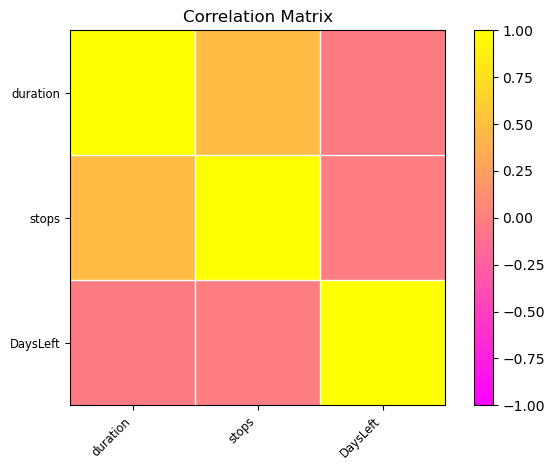

In [136]:
 # Визуализация корреляций
sm.graphics.plot_corr(corr_matrix, xnames=df.columns, normcolor=True, cmap='spring')
plt.show()

## Качественные переменные

In [144]:
df

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,duration,DaysLeft,price,Class
0,0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,2.17,1,5953,1
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,2.33,1,5953,1
2,2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,2.17,1,5956,1
3,3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,2.25,1,5955,1
4,4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,2.33,1,5955,1
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,1,Evening,Hyderabad,10.08,49,69265,0
300149,300149,Vistara,UK-826,Chennai,Afternoon,1,Night,Hyderabad,10.42,49,77105,0
300150,300150,Vistara,UK-832,Chennai,Early_Morning,1,Night,Hyderabad,13.83,49,79099,0
300151,300151,Vistara,UK-828,Chennai,Early_Morning,1,Evening,Hyderabad,10.00,49,81585,0


In [145]:
df.loc[:,['duration','stops','DaysLeft','price','arrival_time','departure_time']]

,duration,stops,DaysLeft,price,arrival_time,departure_time
0,2.17,0,1,5953,Night,Evening
1,2.33,0,1,5953,Morning,Early_Morning
2,2.17,0,1,5956,Early_Morning,Early_Morning
3,2.25,0,1,5955,Afternoon,Morning
4,2.33,0,1,5955,Morning,Morning
...,...,...,...,...,...,...
300148,10.08,1,49,69265,Evening,Morning
300149,10.42,1,49,77105,Night,Afternoon
300150,13.83,1,49,79099,Night,Early_Morning
300151,10.00,1,49,81585,Evening,Early_Morning


In [146]:
df_all = pd.get_dummies(df.loc[:,['duration','stops','DaysLeft','price','arrival_time','departure_time']])
df_all

,duration,stops,DaysLeft,price,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,departure_time_Afternoon,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night
0,2.17,0,1,5953,0,0,0,0,0,1,0,0,1,0,0,0
1,2.33,0,1,5953,0,0,0,0,1,0,0,1,0,0,0,0
2,2.17,0,1,5956,0,1,0,0,0,0,0,1,0,0,0,0
3,2.25,0,1,5955,1,0,0,0,0,0,0,0,0,0,1,0
4,2.33,0,1,5955,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,10.08,1,49,69265,0,0,1,0,0,0,0,0,0,0,1,0
300149,10.42,1,49,77105,0,0,0,0,0,1,1,0,0,0,0,0
300150,13.83,1,49,79099,0,0,0,0,0,1,0,1,0,0,0,0
300151,10.00,1,49,81585,0,0,1,0,0,0,0,1,0,0,0,0


In [148]:
model_flight = smf.ols(formula='price~duration+stops+DaysLeft+arrival_time_Afternoon+arrival_time_Early_Morning+arrival_time_Evening+arrival_time_Late_Night+arrival_time_Morning+arrival_time_Night+departure_time_Afternoon+departure_time_Early_Morning+departure_time_Evening+departure_time_Late_Night+departure_time_Morning+departure_time_Night',data=df_all).fit()
model_flight.params

Intercept                       9829.564284
duration                         535.534727
stops                           2012.553611
DaysLeft                        -135.737788
arrival_time_Afternoon          1653.266228
arrival_time_Early_Morning     -2366.925333
arrival_time_Evening            5484.431815
arrival_time_Late_Night        -3709.049136
arrival_time_Morning            3865.654942
arrival_time_Night              4902.185768
departure_time_Afternoon         274.808571
departure_time_Early_Morning    2196.293695
departure_time_Evening          2587.351620
departure_time_Late_Night      -2779.361812
departure_time_Morning          3190.974599
departure_time_Night            4359.497611
dtype: float64

### Тестируем гипотезу

$$H_0: \beta_{arrival-time-Afternoon}=\beta_{arrival-time-Early-Morning}=\beta_{arrival-time-Evening}=\beta_{arrival-time-Late-Night}=\beta_{arrival-time-Morning}=\beta_{arrival-time-Night}=0$$
    $$H_1: \beta_{arrival-time-Afternoon}^2+\beta_{arrival-time-Early-Morning}^2+\beta_{arrival-time-Evening}^2+\beta_{arrival-time-Late-Night}^2+\beta_{arrival-time-Morning}^2+\beta_{arrival-time-Night}^2>0$$

In [149]:
model_flight.f_test('arrival_time_Afternoon=arrival_time_Early_Morning=arrival_time_Evening=arrival_time_Late_Night=arrival_time_Morning=arrival_time_Night=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=1930.096866845069, p=0.0, df_denom=3e+05, df_num=6>

In [151]:
alpha=0.05
F_cr=stats.f.ppf(1-alpha,6,len(df_all)-6)
F_cr

2.0986279097545464

$F_{cr}<F_{obs}$ нулевую гипотезу отвергаем

### Вывод: влияние значимо

### Тестируем гипотезу

$$H_0: \beta_{departure-time-Afternoon}=\beta_{departure-time-Early-Morning}=\beta_{departure-time-Evening}=\beta_{departure-time-Late-Night}=\beta_{departure-time-Morning}=\beta_{departure-time-Night}=0$$
    $$H_1: \beta_{departure-time-Afternoon}^2+\beta_{depature-time-Early-Morning}^2+\beta_{departure-time-Evening}^2+\beta_{departure-time-Late-Night}^2+\beta_{departure-time-Morning}^2+\beta_{departure-time-Night}^2>0$$

In [153]:
model_flight.f_test('departure_time_Afternoon=departure_time_Early_Morning=departure_time_Evening=departure_time_Late_Night=departure_time_Morning=departure_time_Night=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=1956.3610653933895, p=0.0, df_denom=3e+05, df_num=6>

In [154]:
alpha=0.05
F_cr=stats.f.ppf(1-alpha,6,len(df_all)-6)
F_cr

2.0986279097545464

$F_{cr}<F_{obs}$ нулевую гипотезу отвергаем

### Вывод: влияние значимо

 Визуализация

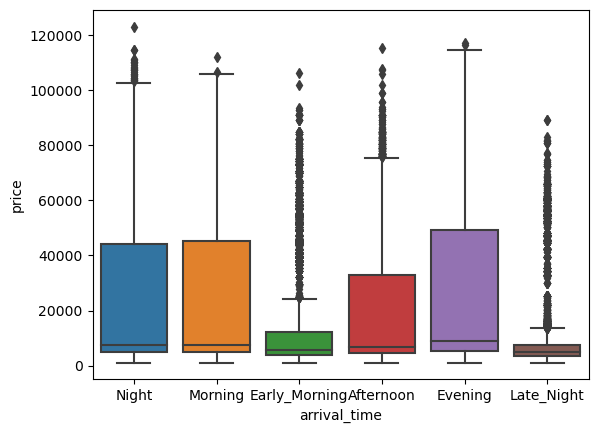

In [161]:
sns.boxplot(x='arrival_time', y='price', data=df)
plt.show(sns)

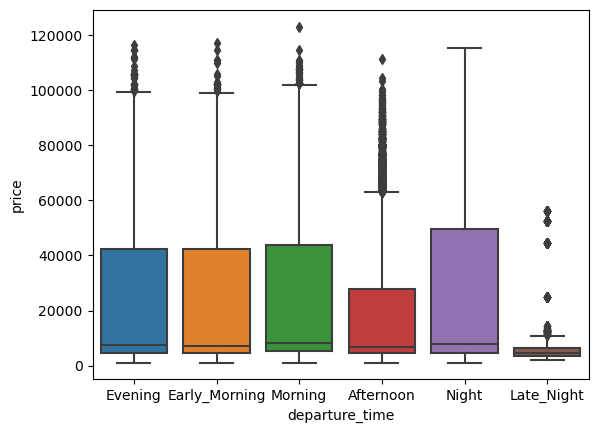

In [158]:
sns.boxplot(x='departure_time', y='price', data=df)
plt.show(sns)

## RESET-тест

In [163]:
df

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,duration,DaysLeft,price,Class
0,0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,2.17,1,5953,1
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,2.33,1,5953,1
2,2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,2.17,1,5956,1
3,3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,2.25,1,5955,1
4,4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,2.33,1,5955,1
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,1,Evening,Hyderabad,10.08,49,69265,0
300149,300149,Vistara,UK-826,Chennai,Afternoon,1,Night,Hyderabad,10.42,49,77105,0
300150,300150,Vistara,UK-832,Chennai,Early_Morning,1,Night,Hyderabad,13.83,49,79099,0
300151,300151,Vistara,UK-828,Chennai,Early_Morning,1,Evening,Hyderabad,10.00,49,81585,0


In [164]:
model=smf.ols(data=df, formula='price~duration+stops+DaysLeft+Class').fit()
hat_y=model.predict()

In [165]:
hat_y

array([ 3531.78215147,  3542.38369557,  3531.78215147, ...,
       49974.10519727, 49720.33073544, 49725.63150749])

In [166]:
df['price2']=hat_y**2
df['price3']=hat_y**3
df['price4']=hat_y**4
df

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,duration,DaysLeft,price,Class,price2,price3,price4
0,0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,2.17,1,5953,1,1.247349e+07,4.405363e+10,1.555878e+14
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,2.33,1,5953,1,1.254848e+07,4.445154e+10,1.574644e+14
2,2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,2.17,1,5956,1,1.247349e+07,4.405363e+10,1.555878e+14
3,3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,2.25,1,5955,1,1.251096e+07,4.425229e+10,1.565240e+14
4,4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,2.33,1,5955,1,1.254848e+07,4.445154e+10,1.574644e+14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,1,Evening,Hyderabad,10.08,49,69265,0,2.472638e+09,1.229535e+14,6.113941e+18
300149,300149,Vistara,UK-826,Chennai,Afternoon,1,Night,Hyderabad,10.42,49,77105,0,2.474879e+09,1.231207e+14,6.125028e+18
300150,300150,Vistara,UK-832,Chennai,Early_Morning,1,Night,Hyderabad,13.83,49,79099,0,2.497411e+09,1.248059e+14,6.237063e+18
300151,300151,Vistara,UK-828,Chennai,Early_Morning,1,Evening,Hyderabad,10.00,49,81585,0,2.472111e+09,1.229142e+14,6.111334e+18


In [168]:
model2=smf.ols(data=df, formula='price~duration+stops+DaysLeft+Class+price2+price3+price4').fit()

In [169]:
R2_un=model2.rsquared
R2_re=model.rsquared

In [170]:
F_obs=(R2_un-R2_re)/(1-R2_un)*(len(df)-8)/3
F_obs

-1462.8691102071427

In [171]:
alpha=0.05
F_cr=stats.f.ppf(1-alpha, 3, len(df)-9)
F_cr

2.6049388735316983

$$H_0: \gamma_1=\gamma_2=\gamma_3=0$$
$$H_1: \gamma_1^2+\gamma_2^2+\gamma_3^2>0$$

$ F_{obs}<F_{cr} \Rightarrow H_O$  не отвергаем.  Регрессия согласуется с данными

## Гетероскедастичность

In [172]:
model=smf.ols(data=df, formula='price~duration+stops+DaysLeft+Class').fit()

Проверим наличие гетероскедастичности с помощью теста Бройша-Пагана. Для этого построим вспомогательную регрессию,зависимой переменной в которой будут квадраты остатков исходной регресси.

In [173]:
df['res2']=model.resid**2
df['res']=model.resid

In [174]:
sub_model= smf.ols(data=df, formula='res2~duration+stops+DaysLeft+Class').fit()

In [175]:
St = np.round(len(df)*sub_model.rsquared,2)
St

59584.88

In [176]:
Hi2 = stats.chi2.ppf(1-0.05,4)
Hi2

9.487729036781154

Тест указывает на гетероскедастичность